In [1]:
from ete3 import Tree
import os
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from physhapes.simulate import simulate_shapes
from physhapes.helper_functions import get_flat_values_sim


In [2]:
# load phylogeny 
tree = Tree('../data/chazot_subtree_rounded.nw')
print(tree)
# load root shape for simulation 
root = np.genfromtxt('../data/hercules_forewing_n=20.csv', delimiter=',')


      /-niepelti
   /-|
  |   \-theseus
--|
  |   /-hercules
   \-|
     |   /-amphitryon
      \-|
         \-telemachus


In [3]:
leafidx = []
inneridx = []
species = []
i = 0
for node in tree.traverse('levelorder'):
    if node.is_leaf():
        print(node.name)
        leafidx.append(i)
        species.append(node.name)
    else:
        inneridx.append(i)
    i+=1
print(leafidx)
print(inneridx)
print(species)

niepelti
theseus
hercules
amphitryon
telemachus
[3, 4, 5, 7, 8]
[0, 1, 2, 6]
['niepelti', 'theseus', 'hercules', 'amphitryon', 'telemachus']


In [4]:
ds = np.random.randint(0, 2**32)
sigma = 0.7
alpha = 0.025
dt = 0.05
outputpath = f'exp_2_sigma={sigma}_alpha={alpha}_dt={dt}/seed={ds}'
os.makedirs(outputpath, exist_ok=True)
simtree = simulate_shapes(ds=ds, dt=dt, sigma=sigma, alpha=alpha, root=root, tree=tree, rb=0)
flat_true_tree = np.array(get_flat_values_sim(simtree)) 
flat_true_tree.shape
#

(9, 40)

In [5]:
np.savetxt(f'{outputpath}/flat_true_tree.csv', flat_true_tree, delimiter=",")

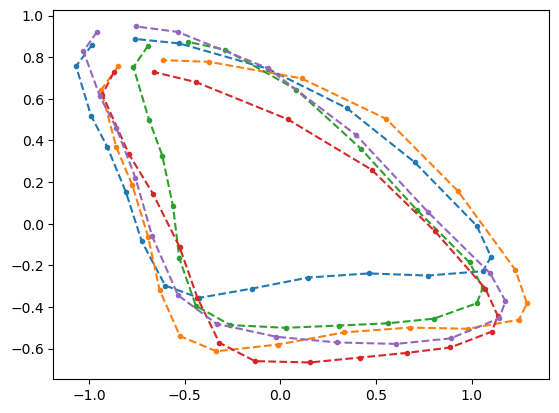

In [6]:
# show leaves 
[plt.plot(flat_true_tree[idx][0::2], flat_true_tree[idx][1::2], '--o', markersize=3, label='Simulated data') for idx in leafidx]
plt.savefig(f'{outputpath}/simulated_leaves.pdf', bbox_inches='tight')

In [7]:
leaves = pd.DataFrame(flat_true_tree[leafidx, :], index=species)
#leaves.columns = [['X'+str(i), 'Y'+str(i)] for i in range(leaves.shape[1] // 2)]
leaves.columns = [f'X{i}' if j % 2 == 0 else f'Y{i}' 
                  for i in range(leaves.shape[1] // 2) for j in range(2)]
print(leaves)
#path = f'comparison/seed={ds}_sigma={sigma}_alpha={alpha}_dt={dt}'
#os.makedirs(path, exist_ok=True)
leaves.to_csv(f'{outputpath}/leaves.csv', index=False, header=False)
flat_true_tree_df = pd.DataFrame(flat_true_tree)
flat_true_tree_df.to_csv(f'{outputpath}/flat_true_tree.csv', index=False, header=False)

                  X0        Y0        X1        Y1        X2        Y2  \
niepelti   -0.982798  0.860851 -1.067756  0.756612 -0.989417  0.519614   
theseus    -0.848670  0.755305 -0.936973  0.641832 -0.857019  0.366962   
hercules   -0.691148  0.855800 -0.767807  0.751674 -0.686043  0.498788   
amphitryon -0.870794  0.726901 -0.930152  0.620311 -0.790836  0.333502   
telemachus -0.957313  0.922584 -1.029266  0.828445 -0.943209  0.612317   

                  X3        Y3        X4        Y4  ...       X15       Y15  \
niepelti   -0.903654  0.367521 -0.806461  0.150147  ...  0.701637  0.294804   
theseus    -0.774666  0.187437 -0.691197 -0.063196  ...  0.926958  0.156972   
hercules   -0.617359  0.327581 -0.561058  0.084327  ...  0.714821  0.063874   
amphitryon -0.665504  0.143117 -0.527233 -0.110922  ...  0.807510 -0.036760   
telemachus -0.857044  0.459801 -0.757309  0.219979  ...  0.772180  0.054528   

                 X16       Y16       X17       Y17       X18       Y18  \
niepel